(39, 128, 128)
(3, 13, 128, 128)


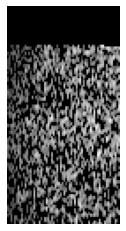

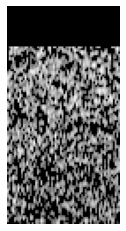

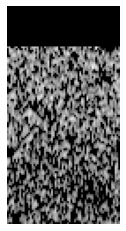

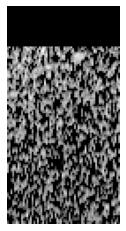

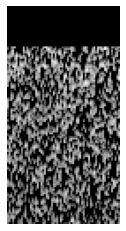

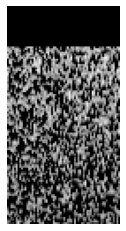

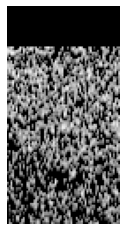

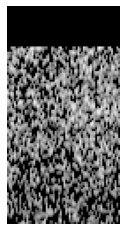

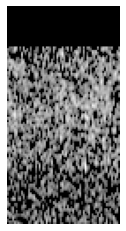

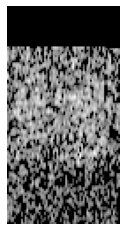

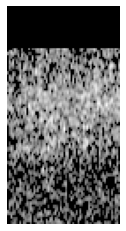

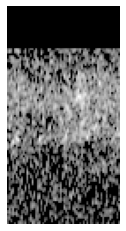

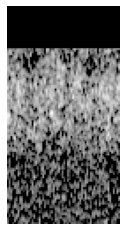

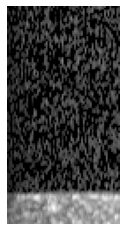

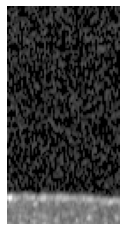

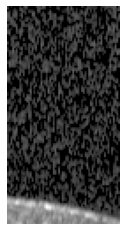

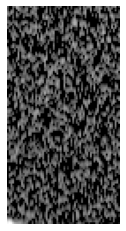

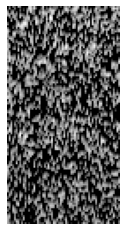

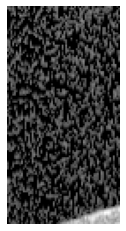

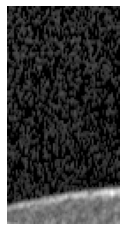

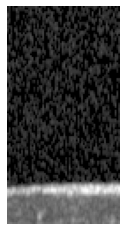

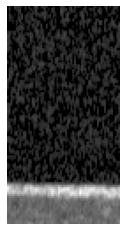

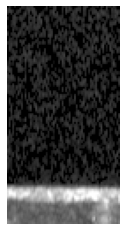

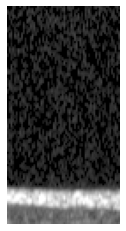

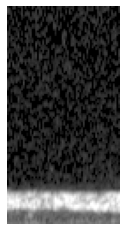

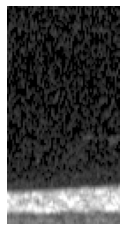

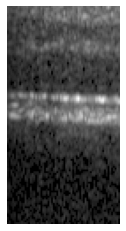

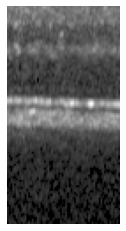

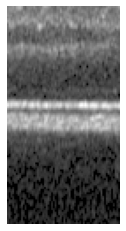

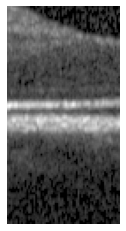

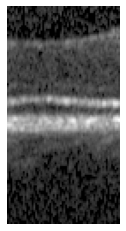

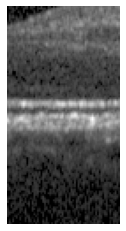

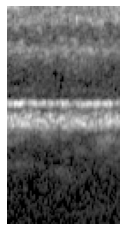

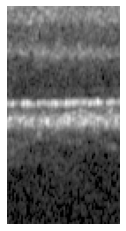

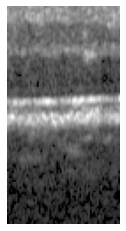

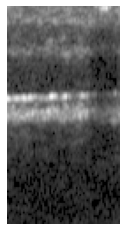

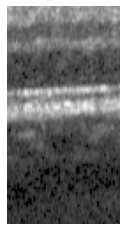

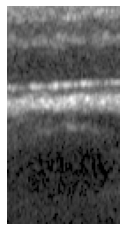

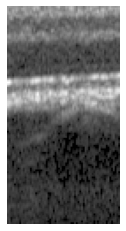

(3, 13, 124, 64)


ValueError: cannot reshape array of size 309504 into shape (496,1024)

In [51]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from patchify import patchify

def patching(img, size, shiftx, shifty):
    vstack = []
    hstack = []
    k = 0
    for i in range(size, img.shape[0]-shiftx, shifty):
        for j in range(size, img.shape[1]-shiftx, shiftx):
            
            single_patch = image[i - size:i, j - size:j]
            # plt.figure()
            # plt.imshow(single_patch, cmap='gray')
            # plt.axis('off')
            # plt.show()
            vstack.append(single_patch)
        k += 1
    vstack = np.array(vstack)
    print(vstack.shape)
    vstack = vstack.reshape(k, vstack.shape[0] // k, vstack.shape[1], vstack.shape[2])
    print(vstack.shape)
    return vstack

def reconstruction(patches, size, shiftx, shifty):
    x = []
    y = []
    for i in range(patches.shape[0]):
        x.clear()
        for j in range(patches.shape[1]):
            temp = patches[i, j, :shifty, :shiftx]
            plt.figure()
            plt.imshow(temp, cmap='gray')
            plt.axis('off')
            plt.show()
            x.append(temp)
        arr = np.array(x)
        y.append(arr)
    print(np.array(y).shape)
    arr = np.array(y).reshape(496, 1024)
    print(np.array(y).shape)
    print(arr.shape)

image = Image.open('../dataset/new_128_3C/Images_val_large/Anonym_5_1963.tiff')
image = np.array(image)
# print(image.shape)

if image.shape[1] == 1536 or image.shape[1] == 768:
    shiftx = 96
if image.shape[1] == 1024 or image.shape[1] == 512:
    shiftx = 64
shifty = 124

asd = patching(image, 128, shiftx, shifty)
reconstruction(asd, size=128, shiftx=shiftx, shifty=shifty)


In [ ]:
import numpy as np

def patching(img, size, shiftx, shifty):
    vstack = []
    hstack = []
    k = 0
    for i in range(size, img.shape[0], shifty):
        for j in range(size, img.shape[1], shiftx):
            single_patch = image[i - size:i, j - size:j]
            vstack.append(single_patch)
        k += 1
    print(k)
    vstack = np.array(vstack)
    print(vstack.shape)
    vstack = vstack.reshape(k+1, vstack.shape[0] // (k+1), vstack.shape[1], vstack.shape[2])
    print(vstack.shape)
    return vstack

x = np.ones((248, 384))

y = patching(x, 128, 64, 124)

